# Predicting the Sale Price of Bulldozers using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

#### 1. Problem defition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

#### 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

#### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

#### 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
#Getting our tools imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing our data
df=pd.read_csv('/home/dinesh/Desktop/Machine Learning/bulldozers/TrainAndValid.csv',low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
#Check the counts of missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Since our target is to predict the saleprice of the bulldozer in the future time, let's visualise the scatter plot of saleprice with date/time.

Text(0, 0.5, 'SalePrice')

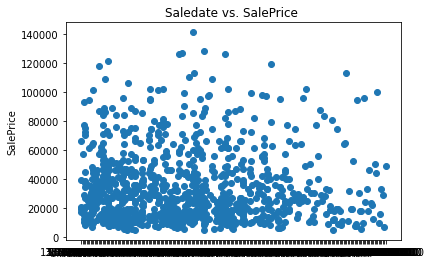

In [5]:
#Since the dataset is too large, let's plot for the first thousand records.
fig,ax=plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000])
plt.title('Saledate vs. SalePrice ')
plt.ylabel('SalePrice')

In [6]:
#Checking the dtype of salesdate column
df.saledate.dtype

dtype('O')

In [7]:
#First 1000 saledate records
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

### Parsing Date

In the time series data problem, we have to enrich the date and time data.
So, to do this we tell pandas which column contains the datetime data.

In [8]:
#Importing the data by parsing datetime
df=pd.read_csv('/home/dinesh/Desktop/Machine Learning/bulldozers/TrainAndValid.csv',
               low_memory=False,
              parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Now let's see how our parsed date column looks like.
df['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [10]:
#Checking the dtype of parsed date column
df.saledate.dtype

dtype('<M8[ns]')

Text(0, 0.5, 'SalePrice')

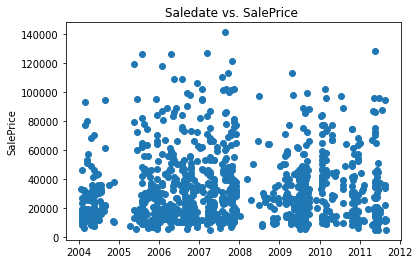

In [11]:
#again, let's visualise the scatter plot of the target column with the parsed date column.
fig,ax=plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000])
plt.title('Saledate vs. SalePrice ')
plt.ylabel('SalePrice')

#### Sorting the data by salesdate column

When working in the time series data, it is better to sort the values in the order of dates,this makes our evaluation easier.

In [12]:
#Sort data
df.sort_values(by='saledate',inplace=True, ascending=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [13]:
#let's check the saledate column
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

#### Make a copy of the original data
Making a copy of the original data ensures our original data unchanged, even it's copy is manipulated

In [14]:
#Make copy
df_copy=df.copy()
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


#### Enriching the  our time series data by adding datetime parameters in datetime column

In [15]:
#creating columns for each parameters in datetime 
#for series objects, datetime=dt
df_copy['salesYear']=df.saledate.dt.year
df_copy['salesMonth']=df.saledate.dt.month
df_copy['salesDay']=df.saledate.dt.day
df_copy['salesDayOfWeek']=df.saledate.dt.dayofweek
df_copy['salesDayOfYear']=df.saledate.dt.dayofyear

In [16]:
#Let's chekc the first 100 records
df_copy[:100].T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,205782,115957,168619,28820,113547,113454,62665,78445,233279,28223
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,1647218,1453139,1595295,1259842,1449754,1449641,1328950,1371695,1729063,1257862
SalePrice,9500,14000,50000,16000,22000,23500,31000,11750,63000,13000,...,12500,37000,16000,9000,11000,11750,19000,28000,48000,25000
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1540235,1456099,1291243,1226323,1486544,492948,1444418,1444477,1059447,1363747
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,8443,3854,8298,6788,3356,3356,4089,1571,9113,6589
datasource,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
auctioneerID,18,99,99,99,99,99,99,99,99,99,...,99,99,18,18,99,99,99,99,4,4
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1979,1978,1977,1978,1967,1966,1983,1982,1984,1983
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00


#### Drop 'saledate' column
Since we have included all info about the saledate in the newly created columns, so there is no longer use of the saledate column.So, let's drop it:

In [17]:
#Drop saledate
df_copy.drop('saledate',axis=1,inplace=True)

In [18]:
#Cheking the dataset once again to ensure that 'saledate' column has been dropped.
df_copy.saledate

AttributeError: 'DataFrame' object has no attribute 'saledate'

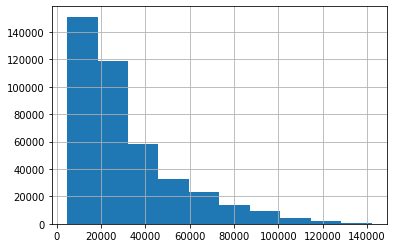

In [20]:
#Visualise the target column(SalePrice) in histogram
df_copy.SalePrice.hist();

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

Since,we've got a lot of missing and non-numeric values, so let's change all dtype into numerical categories.

#### Converting String into Categories

We can convert our string dtypes into numeric form is by converting them into pandas as categories.

In [23]:
#What 'pd.api.types' does ?
pd.api.types.is_string_dtype('Steering_controls')

False

In [31]:
#Now, listing all the columns with string dtypes.
for label,contents in df_copy.items():
    if pd.api.types.is_string_dtype(contents):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
#Now, let's turn all the string values into categories.
for label,contents in df_copy.items():
    if pd.api.types.is_string_dtype(contents):
        df_copy[label]=contents.astype('category').cat.as_ordered()

In [39]:
df_copy

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,salesYear,salesMonth,salesDay,salesDayOfWeek,salesDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


In [40]:
#Checking the dtypes with info function:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

Thus, all the strings have been converted into category

In [42]:
#Let's check the categories of 'state' column
#The 'cat.categories' returns the  unique categories of a series.
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [44]:
#Check the numeric value of these categories
df_copy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Now, we have converted the non-numerical data into numeric form, but still there are a lot of missing values left. So, now let's work on them.

In [47]:
#count of missing values in each columns
df_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [58]:
#Chceking the percentage of missing values in each column.
(df_copy.isna().sum()/len(df_copy))*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save the preprocessed data

Next time when we open this file, we can directly access it from this place.

In [61]:
#Exporting the df_copy DataFrame.
df_copy.to_csv('/home/dinesh/Desktop/Machine Learning/bulldozers/preprocessed.csv',
              index=False)

In [2]:
#Importing the preprocessed DataFrame.
df_copy=pd.read_csv('/home/dinesh/Desktop/Machine Learning/bulldozers/preprocessed.csv',
                   low_memory=False)

In [3]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,salesYear,salesMonth,salesDay,salesDayOfWeek,salesDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Filing the missing values

* #####  Filling the numerical missing values

In [4]:
#Check the columns containing the numerical values
for label,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label) 

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
salesYear
salesMonth
salesDay
salesDayOfWeek
salesDayOfYear


In [5]:
#Checking for the numeric columns with missing values.
for label,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)   

auctioneerID
MachineHoursCurrentMeter


In [6]:
#How many missing values in what columns ?
print(f'Missing values in auctioneerID column : {df_copy.auctioneerID.isna().sum()}')
print(f'Missing values in MAchineHoursCurrentMeter column : {df_copy.MachineHoursCurrentMeter.isna().sum()}')

Missing values in auctioneerID column : 20136
Missing values in MAchineHoursCurrentMeter column : 265194


In [7]:
#Now, let's replace these missing values with their medians
for label,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_copy[label]= content.fillna(content.median())

In [8]:
df_copy

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,salesYear,salesMonth,salesDay,salesDayOfWeek,salesDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


In [9]:
#Let's check if the null values are replaced ?
missing_labels=[]
for label,content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            missing_labels.append(label)

if len(missing_labels)==0:
    print('No missing numerical values left !!')

No missing numerical values left !!


* ##### Filling the categorical missing values


In [10]:
#Check the columns with categorical(or non numeric) values
for label,content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Converting the categorical values into numeric form amd also fill the missing values

* We use pd.Categorical().codes to convert the categorical values into numeric values 
* As we know, the missing values in numeric form are represented by -1. So, to replace the missing values, we add +1 .

In [11]:
#Convert the categorical into numeric and fill the missing values.
for label,content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_copy[label]=pd.Categorical(content).codes+1

In [12]:
#Let's check if there are any missing missing values left.
df_copy.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [13]:
#Check if any non-numeric data present
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   fiModelDesc               412698 non-null  int16  
 10  fiBaseModel               412698 non-null  int16  
 11  fiSecondaryDesc           412698 non-null  int16  
 12  fiModelSeries             412698 non-null  int8   
 13  fiModelDescriptor         412698 non-null  i

## Modelling

We have converted all the values in our dataframe into numeric form and also filled all the missing values.
Now, it's time to build the regressor model.

In [20]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_copy.drop('SalePrice',axis=1),df_copy['SalePrice'])
score=model.score(df_copy.drop('SalePrice',axis=1),df_copy['SalePrice'])
score

0.9875605620349615

The above metric is not reliable to decide the perfectness of our model. So let's proceed by dividing the dataset into train and validation sets.

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

In [14]:
#Checking the number of records in each year
df_copy.salesYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: salesYear, dtype: int64

In [15]:
#Train/Validation sets

#Train_set
train_set=df_copy[df_copy.salesYear!=2012]
X_train=train_set.drop('SalePrice',axis=1)
y_train=train_set['SalePrice']

#Validation_set
valid_set=df_copy[df_copy.salesYear==2012]
X_valid=valid_set.drop('SalePrice',axis=1)
y_valid=valid_set['SalePrice']

In [16]:
#Checking the shape of train and  validation sets
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((401125, 56), (11573, 56), (401125,), (11573,))

In [17]:
#Creating an evaluation function
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

#Root mean square log error
def rmsle(y_test,y_predicted):
    
    #calculate mean_squared_log_error
    msle=mean_squared_log_error(y_test,y_predicted)
    
    return np.sqrt(msle)


#Evaluation metrices
def show_scores(model):
    
    train_predicted=model.predict(X_train)
    valid_predicted=model.predict(X_valid)
    
    score={'Train MSE':mean_absolute_error(y_train,train_predicted),
          'Valid MSE':mean_absolute_error(y_valid,valid_predicted),
          'Train RMSLE':rmsle(y_train,train_predicted),
          'Valid RMSLE':rmsle(y_valid,valid_predicted),
          'Train r^2':r2_score(y_train,train_predicted),
          'Valid r^2':r2_score(y_valid,valid_predicted)}
      
    return score

In [22]:
#Now let's optimize our model.
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42,
                           max_samples=100000)

In [24]:
%%time 
#Fitting the model on train sets
model.fit(X_train,y_train)

CPU times: user 6min 34s, sys: 1.8 s, total: 6min 36s
Wall time: 1min 46s


RandomForestRegressor(max_samples=100000, n_jobs=-1, random_state=42)

In [26]:
#Let's see the evaluationmetrics scores.
show_scores(model)

{'Train MSE': 3587.669749255221,
 'Valid MSE': 6174.934279789165,
 'Train RMSLE': 0.17531579880636083,
 'Valid RMSLE': 0.2558986754975524,
 'Train r^2': 0.9389874088198351,
 'Valid r^2': 0.8719111110936876}

### Hyperparameter Tuning With RandomizedSearchCV


In [32]:
#Determining the hyperparameters of model.
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 100000,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [70]:
#Let's tune the model
from sklearn.model_selection import RandomizedSearchCV

#Defining the hyperparameters
param_grids={'max_depth':[None,3,5,7],
            'max_features':[0.5,1,'auto','sqrt'],
            'max_samples':[10000],
            'n_estimators':np.arange(10,80,10),
            'min_samples_leaf':np.arange(1,10,2),
            'min_samples_split':np.arange(1,20,2)}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                               random_state=42),
                           param_grids,
                           n_iter=2,
                           cv=5,
                           verbose=True)

In [71]:
%%time
#Fitting the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   41.2s finished


CPU times: user 18.9 s, sys: 2.15 s, total: 21.1 s
Wall time: 44.8 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 7],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70])},
                   verbose=True)

In [72]:
#Best parameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 19,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [73]:
#Let's see the evaluation metrics scores with this tuned model.
show_scores(rs_model)

{'Train MSE': 5998.211630114504,
 'Valid MSE': 7517.46620097245,
 'Train RMSLE': 0.27283975743258965,
 'Valid RMSLE': 0.30212015210689375,
 'Train r^2': 0.8360428279577922,
 'Valid r^2': 0.8086643596411975}

In [143]:
#Building a model with best parameters obtained
best_model=RandomForestRegressor(n_jobs=-1,
                                 n_estimators= 30,
                                 min_samples_split= 19,
                                 min_samples_leaf= 5,
                                 max_samples= 10000,
                                 max_features='auto',
                                 max_depth= None,
                                 random_state=42,
                                 verbose=True)

In [145]:
%%time
#Fitting the model
best_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


CPU times: user 7.2 s, sys: 268 ms, total: 7.47 s
Wall time: 2.37 s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished


RandomForestRegressor(max_samples=10000, min_samples_leaf=5,
                      min_samples_split=19, n_estimators=30, n_jobs=-1,
                      random_state=42, verbose=True)

### Make Predictions

In [109]:
#Importing test data
test_set=pd.read_csv('/home/dinesh/Desktop/Machine Learning/bulldozers/Test.csv',
                    low_memory=False,
                    parse_dates=['saledate'])
test_set

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


### Preprocessing the test data
We can't directly make predictions on this test data as it contains non-numeric and missing values as in TrainAndValid set. So, firstly we preprocess the test data and make it ready for prediction.

In [110]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [111]:
pd.api.types.is_string_dtype(test_set)

False

In [112]:
#Let's preprocess the data.
def preprocess_data(test_set):
#Enriching the date column.
    import datetime as datetime

    test_set['salesYear']=test_set.saledate.dt.year
    test_set['salesMonth']=test_set.saledate.dt.month
    test_set['salesDay']=test_set.saledate.dt.day
    test_set['salesDayOfWeek']=test_set.saledate.dt.dayofweek
    test_set['salesDayOfYear']=test_set.saledate.dt.dayofyear
    
    #Drop the saledate column
    test_set.drop('saledate',axis=1,inplace=True)

    #Filling the missing numeric values with their medians.
    for label,content in test_set.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                test_set[label]=content.fillna(content.median())

    #Converting Categorical into numeric form and then filling the categorical(here it is object) missing values. 
    for label,content in test_set.items():
        if not pd.api.types.is_numeric_dtype(content):
            test_set[label]=pd.Categorical(content).codes+1
            
    return test_set


In [113]:
df_test=preprocess_data(test_set)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,salesYear,salesMonth,salesDay,salesDayOfWeek,salesDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,0,0,0,0,0,2012,10,24,2,298
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,0,0,0,0,0,2012,10,24,2,298
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,0,0,0,0,0,2012,10,24,2,298
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,0,0,0,0,0,2012,10,24,2,298


In [114]:
#Check the dtypes and number of missing values if present
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  12457 non-null  float64
 7   UsageBand                 12457 non-null  int8   
 8   fiModelDesc               12457 non-null  int16  
 9   fiBaseModel               12457 non-null  int16  
 10  fiSecondaryDesc           12457 non-null  int8   
 11  fiModelSeries             12457 non-null  int8   
 12  fiModelDescriptor         12457 non-null  int8   
 13  ProductSize               12457 non-null  int8   
 14  fiProd

In [115]:
#Missing_values ??
df_test.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [123]:
#Now, let's make the prediction
y_prediction=rs_model.predict(df_test)
y_prediction

array([18486.04821309, 21760.90698621, 56174.09294982, ...,
       11487.68748055, 15725.31393372, 24185.78209742])

Now let's submit the price in the form as asked by Kaggle:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation


In [124]:
#Creating a dataframe of SalesID and predicted price of the bulldozers
price_df=pd.DataFrame({'SalesID':df_test.SalesID,
                      'SalesPrice':y_prediction})
price_df

,SalesID,SalesPrice
0,1227829,18486.048213
1,1227844,21760.906986
2,1227847,56174.092950
3,1227848,82893.362424
4,1227863,38987.589600
...,...,...
12452,6643171,43207.816661
12453,6643173,11699.205333
12454,6643184,11487.687481
12455,6643186,15725.313934


In [139]:
#Let's export the price DataFrame into csv file.
price_df.to_csv('/home/dinesh/Desktop/Machine Learning/bulldozers/predicted_price.csv',index=False)

### Feature Importances

In [158]:
#Creating a function to find and plot the most important features
def plot_feature_imp(columns,feature_importances,n=15):
    imp_df=(pd.DataFrame({'Features':columns,
                          'Feature_Importances':feature_importances})
            .sort_values(by='Feature_Importances',ascending=False)
            .reset_index(drop=True))
    
    #Plotting the dataframe
    fig,ax=plt.subplots()
    ax.bar(imp_df['Features'][:n],imp_df['Feature_Importances'][:n])
    ax.set_xlabel('Features')
    ax.set_ylabel('Feature Importances')
    plt.xticks(rotation=90)

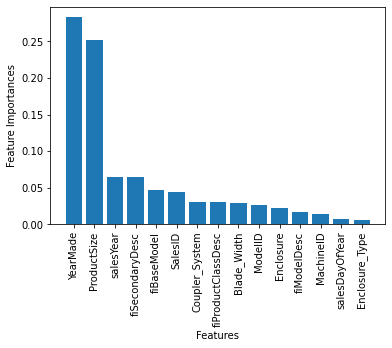

In [159]:
#Let's call the plotting helper function
plot_feature_imp(X_train.columns,best_model.feature_importances_)

This shows that 'YearMade' ,'ProductSize' are the most importance features and the order of importances decreases as the height of the bar decreases.

### Experimentation

Under the expermentation, we can search for other possible ways to improvise our model.

1. Can we use the other better models like Gradient Boosters ?
2. Can we collect more data ?
3. Can we use the other metrics for the evaluation?